In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
upload_image="D:\\medicinal\\Medicinal plant dataset\\Avacado\\482.jpg"

In [3]:
plant_properties=[{"Name": "Aloevera", "Scientific Name": "Aloe vera", "Health Properties": ["Anti-inflammatory", "Antioxidant", "Wound healing"], "Proper Diseases": ["Skin burns", "Wounds", "Constipation", "Diabetes", "Digestive disorders", "Psoriasis", "Acne"]}, {"Name": "Amla", "Scientific Name": "Phyllanthus emblica", "Health Properties": ["Antioxidant", "Immune-boosting", "Digestive aid"], "Proper Diseases": ["Antioxidant", "Digestive disorders", "Hair health", "Diabetes", "Heart health", "Liver detoxification", "Anemia"]}, {"Name": "Amruta_Balli", "Scientific Name": "Tinospora cordifolia", "Health Properties": ["Immunomodulatory", "Antipyretic", "Anti-diabetic"], "Proper Diseases": ["Immune system disorders", "Fever", "Diabetes", "Respiratory disorders", "Skin disorders", "Arthritis", "Malaria"]}, {"Name": "Arali", "Scientific Name": "Ficus racemosa", "Health Properties": ["Anti-inflammatory", "Antioxidant", "Anti-diabetic"], "Proper Diseases": ["Respiratory disorders", "Diabetes", "Skin conditions", "Fever", "Hemorrhoids", "Ulcers"]}, {"Name": "Ashoka", "Scientific Name": "Saraca asoca", "Health Properties": ["Uterine health", "Antimicrobial", "Anti-inflammatory"], "Proper Diseases": ["Menstrual disorders", "Uterine health", "Diabetes", "Skin conditions", "Bleeding disorders", "Anemia"]}, {"Name": "Ashwagandha", "Scientific Name": "Withania somnifera", "Health Properties": ["Adaptogen", "Anti-stress", "Immune support"], "Proper Diseases": ["Stress", "Anxiety", "Immune system support", "Insomnia", "Arthritis", "Thyroid disorders"]}, {"Name": "Avocado", "Scientific Name": "Persea americana", "Health Properties": ["Heart-healthy fats", "Skin nourishing", "Anti-inflammatory"], "Proper Diseases": ["Skin health", "Heart health", "Arthritis", "Digestive disorders", "Cholesterol management"]}, {"Name": "Bamboo", "Scientific Name": "Bambusoideae", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"], "Proper Diseases": ["Fever", "Respiratory disorders", "Digestive disorders", "Urinary disorders", "Bone health", "Dental health"]}, {"Name": "Basale", "Scientific Name": "Basella alba", "Health Properties": ["Nutrient-rich", "Antioxidant", "Anti-inflammatory"], "Proper Diseases": ["Iron deficiency", "Digestive health", "Respiratory ailments", "Eye health", "Bone health"]}, {"Name": "Betel", "Scientific Name": "Piper betle", "Health Properties": ["Antibacterial", "Digestive aid", "Oral health"], "Proper Diseases": ["Oral health", "Digestion", "Respiratory ailments", "Diabetes", "Joint pain"]}, {"Name": "Betel_Nut", "Scientific Name": "Areca catechu", "Health Properties": ["Stimulant", "Digestive aid", "Antiparasitic"], "Proper Diseases": ["Digestive disorders", "Parasite infections", "Respiratory ailments", "Mouth ulcers", "Intestinal worms"]}, {"Name": "Brahmi", "Scientific Name": "Bacopa monnieri", "Health Properties": ["Memory enhancer", "Antioxidant", "Anxiolytic"], "Proper Diseases": ["Memory enhancement", "Anxiety", "Depression", "Epilepsy", "ADHD"]}, {"Name": "Castor", "Scientific Name": "Ricinus communis", "Health Properties": ["Laxative", "Anti-inflammatory", "Skin conditioning"], "Proper Diseases": ["Constipation", "Skin ailments", "Rheumatism", "Menstrual disorders", "Arthritis", "Liver detoxification"]}, {"Name": "Curry_Leaf", "Scientific Name": "Murraya koenigii", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"], "Proper Diseases": ["Digestive disorders", "Diabetes", "Hair health", "Eye health", "Cholesterol management"]}, {"Name": "Doddapatre", "Scientific Name": "Plectranthus amboinicus", "Health Properties": ["Anti-inflammatory", "Antibacterial", "Respiratory aid"], "Proper Diseases": ["Cough", "Cold", "Respiratory ailments", "Digestive disorders", "Wounds", "Dental health"]}, {"Name": "Ekka", "Scientific Name": "Calotropis procera", "Health Properties": ["Anti-inflammatory", "Antimicrobial", "Pain reliever"], "Proper Diseases": ["Skin conditions", "Asthma", "Wounds", "Rheumatism", "Digestive disorders", "Malaria"]}, {"Name": "Ganike", "Scientific Name": "Passiflora foetida", "Health Properties": ["Sedative", "Anxiolytic", "Antispasmodic"], "Proper Diseases": ["Anxiety", "Insomnia", "Digestive disorders", "Respiratory ailments", "Menstrual disorders"]}, {"Name": "Gauva", "Scientific Name": "Psidium guajava", "Health Properties": ["Antioxidant", "Antimicrobial", "Digestive aid"], "Proper Diseases": ["Diarrhea", "Dysentery", "Diabetes", "Skin conditions", "Gum health"]}, {"Name": "Geranium", "Scientific Name": "Pelargonium graveolens", "Health Properties": ["Antibacterial", "Antifungal", "Anti-inflammatory"], "Proper Diseases": ["Skin infections", "Stress relief", "Depression", "Menstrual disorders", "Respiratory ailments"]}, {"Name": "Henna", "Scientific Name": "Lawsonia inermis", "Health Properties": ["Natural dye", "Hair conditioner", "Antimicrobial"], "Proper Diseases": ["Hair health", "Skin conditions", "Wounds", "Headaches", "Fungal infections"]}, {"Name": "Hibiscus", "Scientific Name": "Hibiscus rosa-sinensis", "Health Properties": ["Antioxidant", "Blood pressure lowering", "Hair health"], "Proper Diseases": ["Hair health", "Blood pressure", "Digestive disorders", "Menstrual disorders", "Liver detoxification"]}, {"Name": "Honge", "Scientific Name": "Pongamia pinnata", "Health Properties": ["Antimicrobial", "Anti-inflammatory", "Pain reliever"], "Proper Diseases": ["Skin disorders", "Diabetes", "Rheumatism", "Wounds", "Respiratory ailments"]}, {"Name": "Insulin", "Scientific Name": "Syzygium cumini", "Health Properties": ["Hypoglycemic", "Antioxidant", "Digestive aid"], "Proper Diseases": ["Diabetes", "Digestive health", "Respiratory ailments", "Heart health", "Cholesterol management"]}, {"Name": "Jasmine", "Scientific Name": "Jasminum officinale", "Health Properties": ["Anxiolytic", "Antidepressant", "Antispasmodic"], "Proper Diseases": ["Anxiety", "Depression", "Skin conditions", "Respiratory ailments", "Menstrual disorders"]}, {"Name": "Lemon", "Scientific Name": "Citrus limon", "Health Properties": ["Antioxidant", "Digestive aid", "Immune-boosting"], "Proper Diseases": ["Digestive disorders", "Scurvy", "Weight loss", "Skin health", "Respiratory ailments"]}, {"Name": "Lemon_grass", "Scientific Name": "Cymbopogon citratus", "Health Properties": ["Antimicrobial", "Digestive aid", "Stress relief"], "Proper Diseases": ["Digestive disorders", "Stress relief", "Fever", "Colds", "Muscle pain", "Joint pain"]}, {"Name": "Mango", "Scientific Name": "Mangifera indica", "Health Properties": ["Antioxidant", "Digestive aid", "Immune-boosting"], "Proper Diseases": ["Diabetes", "Digestive health", "Skin health", "Heart health", "Eye health"]}, {"Name": "Mint", "Scientific Name": "Mentha spp.", "Health Properties": ["Digestive aid", "Antimicrobial", "Mentally stimulating"], "Proper Diseases": ["Digestive disorders", "Respiratory ailments", "Headaches", "Stress relief", "Nausea", "Menstrual disorders"]}, {"Name": "Nagadali", "Scientific Name": "Mesua ferrea", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"], "Proper Diseases": ["Menstrual disorders", "Skin conditions", "Digestive disorders", "Respiratory ailments", "Joint pain", "Wounds"]}, {"Name": "Neem", "Scientific Name": "Azadirachta indica", "Health Properties": ["Antimicrobial", "Anti-inflammatory", "Antipyretic"], "Proper Diseases": ["Skin conditions", "Insect repellent", "Fever", "Digestive disorders", "Malaria", "Parasitic infections"]}, {"Name": "Nithyapushpa", "Scientific Name": "Vinca rosea", "Health Properties": ["Anticancer", "Antioxidant", "Antihypertensive"], "Proper Diseases": ["Diabetes", "Cancer (traditional uses)", "Hypertension", "Digestive disorders", "Mental health disorders"]}, {"Name": "Nooni", "Scientific Name": "Vitex negundo", "Health Properties": ["Antipyretic", "Analgesic", "Anti-inflammatory"], "Proper Diseases": ["Respiratory ailments", "Fever", "Digestive disorders", "Arthritis", "Malaria", "Headaches"]}, {"Name": "Pappaya", "Scientific Name": "Carica papaya", "Health Properties": ["Digestive aid", "Antioxidant", "Immune-boosting"], "Proper Diseases": ["Digestive disorders", "Skin conditions", "Parasitic infections", "Cancer", "Liver detoxification"]}, {"Name": "Pepper", "Scientific Name": "Piper nigrum", "Health Properties": ["Digestive aid", "Antioxidant", "Anti-inflammatory"], "Proper Diseases": ["Digestive disorders", "Respiratory health", "Arthritis", "Weight loss", "Cholesterol management"]}, {"Name": "Pomegranate", "Scientific Name": "Punica granatum", "Health Properties": ["Antioxidant", "Heart-protective", "Anticancer"], "Proper Diseases": ["Heart health", "Antioxidant", "Digestive disorders", "Cancer", "Liver detoxification"]}, {"Name": "Raktachandini", "Scientific Name": "Eclipta prostrata", "Health Properties": ["Hair health", "Liver tonic", "Antioxidant"], "Proper Diseases": ["Hair health", "Liver disorders", "Skin conditions", "Respiratory ailments", "Digestive disorders", "Jaundice"]}, {"Name": "Rose", "Scientific Name": "Rosa spp.", "Health Properties": ["Antioxidant", "Astringent", "Antidepressant"], "Proper Diseases": ["Skin health", "Anxiety", "Digestive disorders", "Heart health", "Menstrual disorders"]}, {"Name": "Sapota", "Scientific Name": "Manilkara zapota", "Health Properties": ["Digestive aid", "Antioxidant", "Anti-inflammatory"], "Proper Diseases": ["Digestive disorders", "Cough", "Respiratory ailments", "Skin conditions", "Diabetes"]}, {"Name": "Tulasi", "Scientific Name": "Ocimum tenuiflorum", "Health Properties": ["Antimicrobial", "Adaptogen", "Respiratory aid"], "Proper Diseases": ["Respiratory ailments", "Stress relief", "Digestive disorders", "Headaches", "Fever", "Malaria"]}, {"Name": "Wood_sorel", "Scientific Name": "Oxalis spp.", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"], "Proper Diseases": ["Digestive disorders", "Fever", "Skin conditions", "Urinary tract infections", "Gout", "Joint pain"]}]

class_names=['Aloevera',
 'Amla',
 'Amruta_Balli',
 'Arali',
 'Ashoka',
 'Ashwagandha',
 'Avacado',
 'Bamboo',
 'Basale',
 'Betel',
 'Betel_Nut',
 'Brahmi',
 'Castor',
 'Curry_Leaf',
 'Doddapatre',
 'Ekka',
 'Ganike',
 'Gauva',
 'Geranium',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jasmine',
 'Lemon',
 'Lemon_grass',
 'Mango',
 'Mint',
 'Nagadali',
 'Neem',
 'Nithyapushpa',
 'Nooni',
 'Pappaya',
 'Pepper',
 'Pomegranate',
 'Raktachandini',
 'Rose',
 'Sapota',
 'Tulasi',
 'Wood_sorel']

In [4]:
model=load_model("best_plant_model.h5")

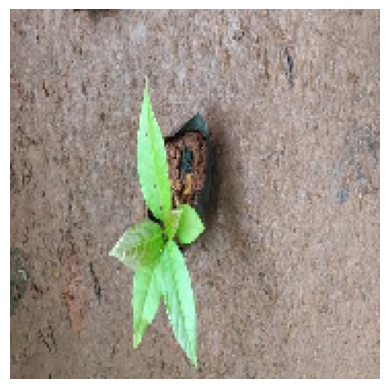

In [5]:
image_path = upload_image
img = tf.keras.utils.load_img(image_path, target_size=(180,180))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array,verbose=False)
score = tf.nn.softmax(predictions[0])
plant_index=np.argmax(score)
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
print(f" Plant:{class_names[np.argmax(score)]}","\n",f"Confidence:{100 * np.max(score):.2f}%")
print("properties:")

 Plant:Geranium 
 Confidence:29.02%
properties:


In [7]:
plant_properties[plant_index]

{'Name': 'Geranium',
 'Scientific Name': 'Pelargonium graveolens',
 'Health Properties': ['Antibacterial', 'Antifungal', 'Anti-inflammatory'],
 'Proper Diseases': ['Skin infections',
  'Stress relief',
  'Depression',
  'Menstrual disorders',
  'Respiratory ailments']}